![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]


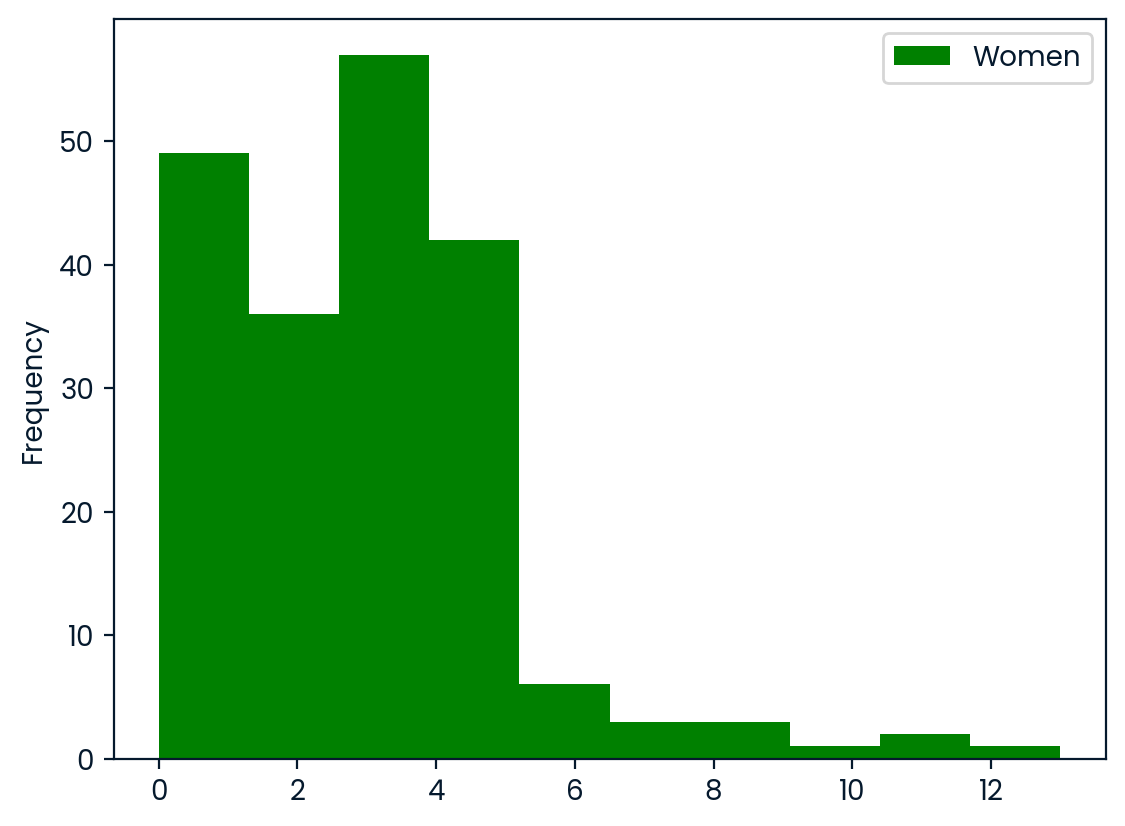

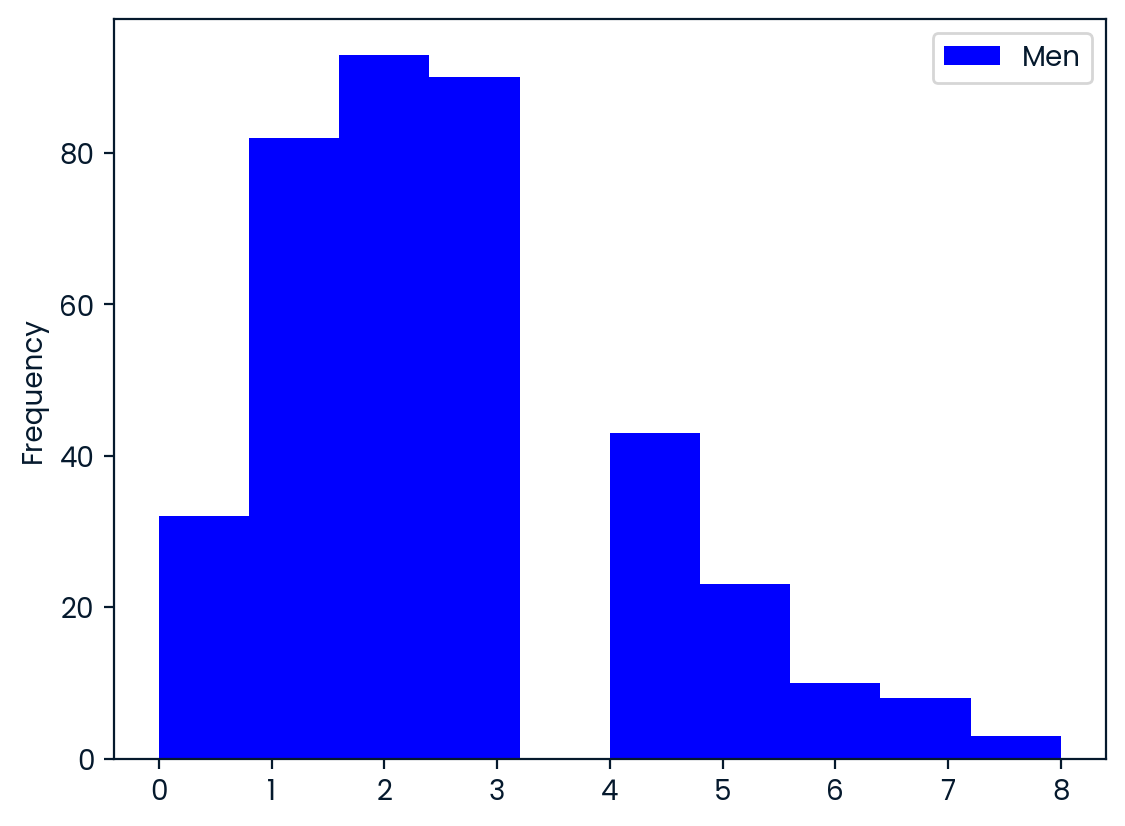

The mean of goals scored for women is 2.98.
Statistic: 0.8491013050079346 and p_value: 0.00
The data does not look normally distributed (reject H0) 

The mean of goals scored for men is 2.5130208333333335.
Statistic: 0.9266489744186401 and p_value: 0.00
The data does not look normally distributed (reject H0) 

Mannwhitney  p_value is : 0.0051
The null hypothesis is rejected (There is a significant difference between goals scores of men and women (p_value < 0.1)).
{'p_val': 0.005106609825443641, 'result': 'reject'}


In [30]:
# Start your code here!
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
women_results = pd.read_csv('women_results.csv')
men_results = pd.read_csv('men_results.csv')

print(women_results.head())
print(men_results.head())

# Convert date columns to datetime
women_results['date'] = pd.to_datetime(women_results['date'])
men_results['date'] = pd.to_datetime(men_results['date'])

# Filter for matches since 2002-01-01 and only World Cup matches
start_date = pd.Timestamp('2002-01-01')
women_wc = women_results[(women_results['date'] >= start_date) & (women_results['tournament'] == 'FIFA World Cup')]
men_wc = men_results[(men_results['date'] >= start_date) & (men_results['tournament'] == 'FIFA World Cup')]

# Calculate total goals scored in each match
women_wc['total_goals'] = women_wc['home_score'] + women_wc['away_score']
men_wc['total_goals'] = men_wc['home_score'] + men_wc['away_score']

# Extract the total goals into separate lists
women_goals = women_wc['total_goals']
men_goals = men_wc['total_goals']

# plotting to see the best hypothesis test for Women
women_goals.plot(kind='hist', label='Women', color ='green')
plt.legend()
plt.show()
# plotting to see the best hypothesis test for men
men_goals.plot(kind='hist', label='Men', color ='blue')
plt.legend()
plt.show()


# Determining of normality and mean goal scores for women
print(f"The mean of goals scored for women is {women_goals.mean()}.")
statistic, p_value = shapiro(women_goals)
print(f"Statistic: {statistic} and p_value: {p_value:.2f}")

alpha = 0.10
if p_value > alpha:
    print("The data looks normally distributed (fail to reject H0)", '\n')
else:
    print("The data does not look normally distributed (reject H0)", '\n')
 

#  Determining of normality and mean goal scores for men
print(f"The mean of goals scored for men is {men_goals.mean()}.")
statistic, p_value = shapiro(men_goals)
print(f"Statistic: {statistic} and p_value: {p_value:.2f}")

alpha = 0.10
if p_value > alpha:
    print("The data looks normally distributed (fail to reject H0)", '\n')
else:
    print("The data does not look normally distributed (reject H0)", '\n')
 

#Since there is no normal distribution for both plots and is right-skewed plot, we can use non-parametric test, which is Wilcoxon-Mann-Whitney test. 


# Performing the hypothesis test

statistic, p_val = stats.mannwhitneyu(women_goals, men_goals, alternative="greater")
print(f'Mannwhitney  p_value is : {p_val:.4f}')

alpha = 0.10
if p_val > alpha:
    print("The null hypothesis cannot be rejected (There is no significant difference between goals scores of men and women (p_value > 0.1)).")
else:
    print("The null hypothesis is rejected (There is a significant difference between goals scores of men and women (p_value < 0.1)).")
    
# Interpreting the result of the hypothesis test
if p_val < 0.10:
    result = 'reject'
else:
    result = 'fail to reject'

result_dict = {"p_val": p_val, "result": result}
print(result_dict)


#By rejecting the null hypothesis, we conclude that there is sufficient evidence to support the claim that the mean number of goals scored in women's international soccer matches is greater than in men's international soccer matches.

#If the p-value were greater than or equal to 0.10, we would fail to reject the null hypothesis, indicating insufficient evidence to support the claim that women's matches have a higher mean number of goals scored than men's matches.
